### Evaluation for Classification

In [43]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

In [44]:
dataset = load_digits()
X,y = dataset.data, dataset.target

for class_name, class_count in zip (dataset.target_names, np.bincount(dataset.target)):
    print(class_name, class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [45]:
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

y_binary_imbalanced

array([0, 1, 0, ..., 0, 0, 0])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y_binary_imbalanced, random_state=0)

from sklearn.svm import SVC

svm = SVC(kernel ='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9955555555555555

#### Dummy Classifiers

Make prediction with simple rules, can be used as a baseline for comaprison against actual classifiers

In [47]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_dummy_predictions = dummy_majority.predict(X_test)
y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [48]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

In [49]:
svm = SVC(kernel = 'linear', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9777777777777777

#### Confusion Matrices

binary (two-class) confusion matrix

In [50]:
# strategy = 'most_frequent'
from sklearn.metrics import confusion_matrix
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('most frequent class (dummy classifier)\n', confusion)

most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


In [51]:
# strategy = 'stratified': i.e. same class proportion as training set
dummy_classprop = DummyClassifier(strategy ='stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix (y_test, y_classprop_predicted)

print(confusion)

[[369  38]
 [ 39   4]]


In [52]:
# SVM
svm = SVC(kernel = 'linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)
print(confusion)

[[402   5]
 [  5  38]]


In [53]:
# logistic regression classifier
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)
print(confusion)

[[401   6]
 [  8  35]]


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)
print(confusion)

[[400   7]
 [ 17  26]]


#### Evaluation metrics for binary classification

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy: ', accuracy_score(y_test, tree_predicted))
print('Precision: ', precision_score(y_test, tree_predicted))
print('Recall: ', recall_score(y_test, tree_predicted))
print('F1: ', f1_score(y_test, tree_predicted))

Accuracy:  0.9466666666666667
Precision:  0.7878787878787878
Recall:  0.6046511627906976
F1:  0.6842105263157895


In [56]:
from sklearn.metrics import classification_report
print('Decision Tree')
print(classification_report(y_test, tree_predicted, target_names=['not 1', '1']))

Decision Tree
              precision    recall  f1-score   support

       not 1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

    accuracy                           0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450



In [57]:
print('random class-proportional (dummy)')
print(classification_report(y_test, y_classprop_predicted, target_names=['not 1', '1']))

random class-proportional (dummy)
              precision    recall  f1-score   support

       not 1       0.90      0.91      0.91       407
           1       0.10      0.09      0.09        43

    accuracy                           0.83       450
   macro avg       0.50      0.50      0.50       450
weighted avg       0.83      0.83      0.83       450



In [58]:
print('SVM')
print(classification_report(y_test, svm_predicted, target_names=['not 1', '1']))

SVM
              precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       407
           1       0.88      0.88      0.88        43

    accuracy                           0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450



In [59]:
print('Logsitic regression')
print(classification_report(y_test, lr_predicted, target_names=['not 1', '1']))

Logsitic regression
              precision    recall  f1-score   support

       not 1       0.98      0.99      0.98       407
           1       0.85      0.81      0.83        43

    accuracy                           0.97       450
   macro avg       0.92      0.90      0.91       450
weighted avg       0.97      0.97      0.97       450



#### Decision Functions 

In [60]:
#decision funciton scores
X_train, X_test, y_train, y_test = train_test_split(X,y_binary_imbalanced, random_state=0)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))
y_score_list

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[(0, -29.82878093289564),
 (0, -19.382868136191092),
 (0, -29.198477132775224),
 (0, -21.746275235927797),
 (0, -22.64237889469752),
 (0, -11.80593855115982),
 (1, 6.496008418063333),
 (0, -23.354612661581005),
 (0, -27.54378195102965),
 (0, -26.888212730603293),
 (0, -31.862942870665947),
 (0, -22.4860858915235),
 (0, -25.318025870877417),
 (0, -13.384522823485145),
 (0, -13.565640196019885),
 (0, -13.30835694019057),
 (1, 12.180923756183894),
 (0, -34.36243664197358),
 (0, -13.231540188982551),
 (0, -29.593978485834487)]

In [61]:
#probablity of positive class
X_train, X_test, y_train, y_test = train_test_split(X,y_binary_imbalanced, random_state=0)
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))
y_proba_list

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[(0, 1.1105165595379948e-13),
 (0, 3.8205626293175675e-09),
 (0, 2.0857511958590864e-13),
 (0, 3.595113972222689e-10),
 (0, 1.4673705169996273e-10),
 (0, 7.460068128707603e-06),
 (1, 0.9984928227255859),
 (0, 7.19814505285595e-11),
 (0, 1.0911576151132498e-12),
 (0, 2.1018299821255864e-12),
 (0, 1.4524451277750545e-14),
 (0, 1.715603713565714e-10),
 (0, 1.0104645261970616e-11),
 (0, 1.5387743081136656e-06),
 (0, 1.283857320626847e-06),
 (0, 1.660555121847596e-06),
 (1, 0.9999948726873376),
 (0, 1.1928432618139946e-15),
 (0, 1.7931405430292163e-06),
 (0, 1.4044246583568424e-13)]

#### Precision-recall curves

<IPython.core.display.Javascript object>


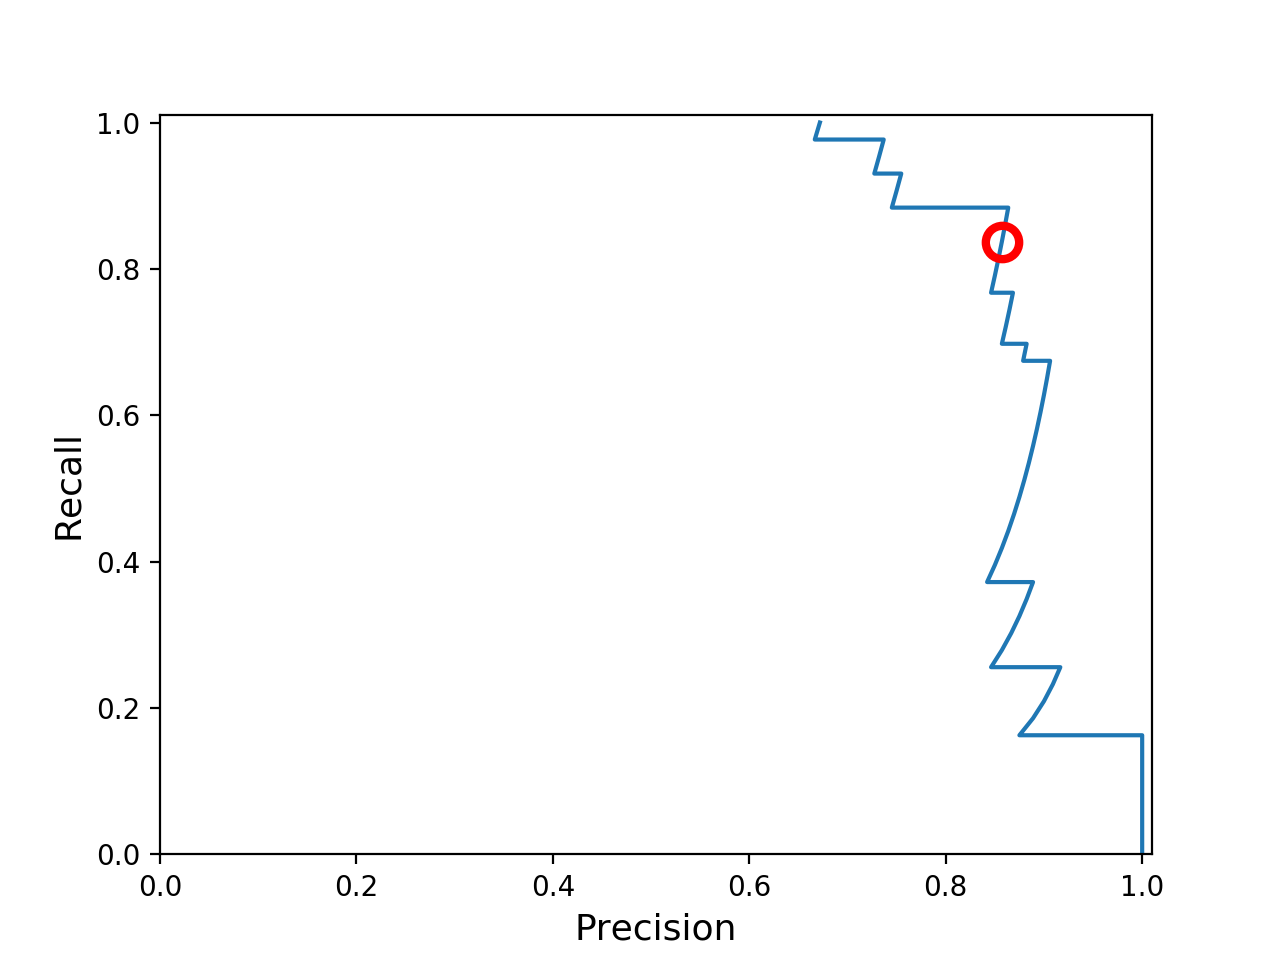

In [62]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0,1.01])
plt.ylim([0.0,1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o',markersize=12,fillstyle='none',c='r',mew=3)
plt.xlabel('Precision', fontsize=13)
plt.ylabel('Recall', fontsize=13)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<IPython.core.display.Javascript object>


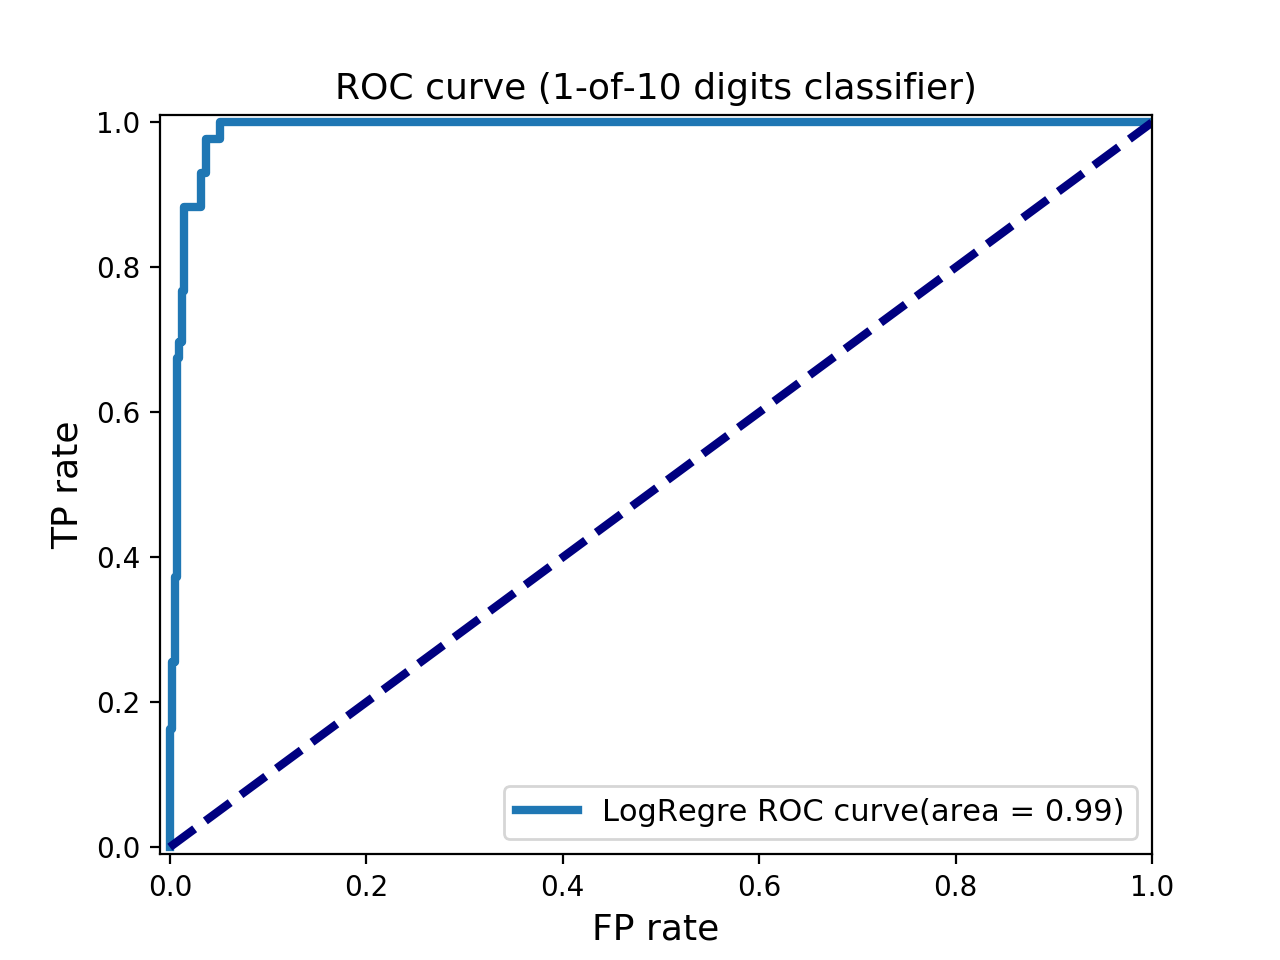

In [63]:
from sklearn.metrics import roc_curve, auc
X_train, X_test, y_train, y_test = train_test_split(X,y_binary_imbalanced, random_state=0)
y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test,y_score_lr)
roc_auc_lr = auc(fpr_lr,tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3,label='LogRegre ROC curve(area = {:0.2f})'.format(roc_auc_lr))
plt.plot([0,1],[0,1],color='navy',lw=3,linestyle='--')
plt.xlabel('FP rate', fontsize=13)
plt.ylabel('TP rate', fontsize=13)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=13)
plt.legend(loc='lower right', fontsize=11)
plt.show()

<IPython.core.display.Javascript object>


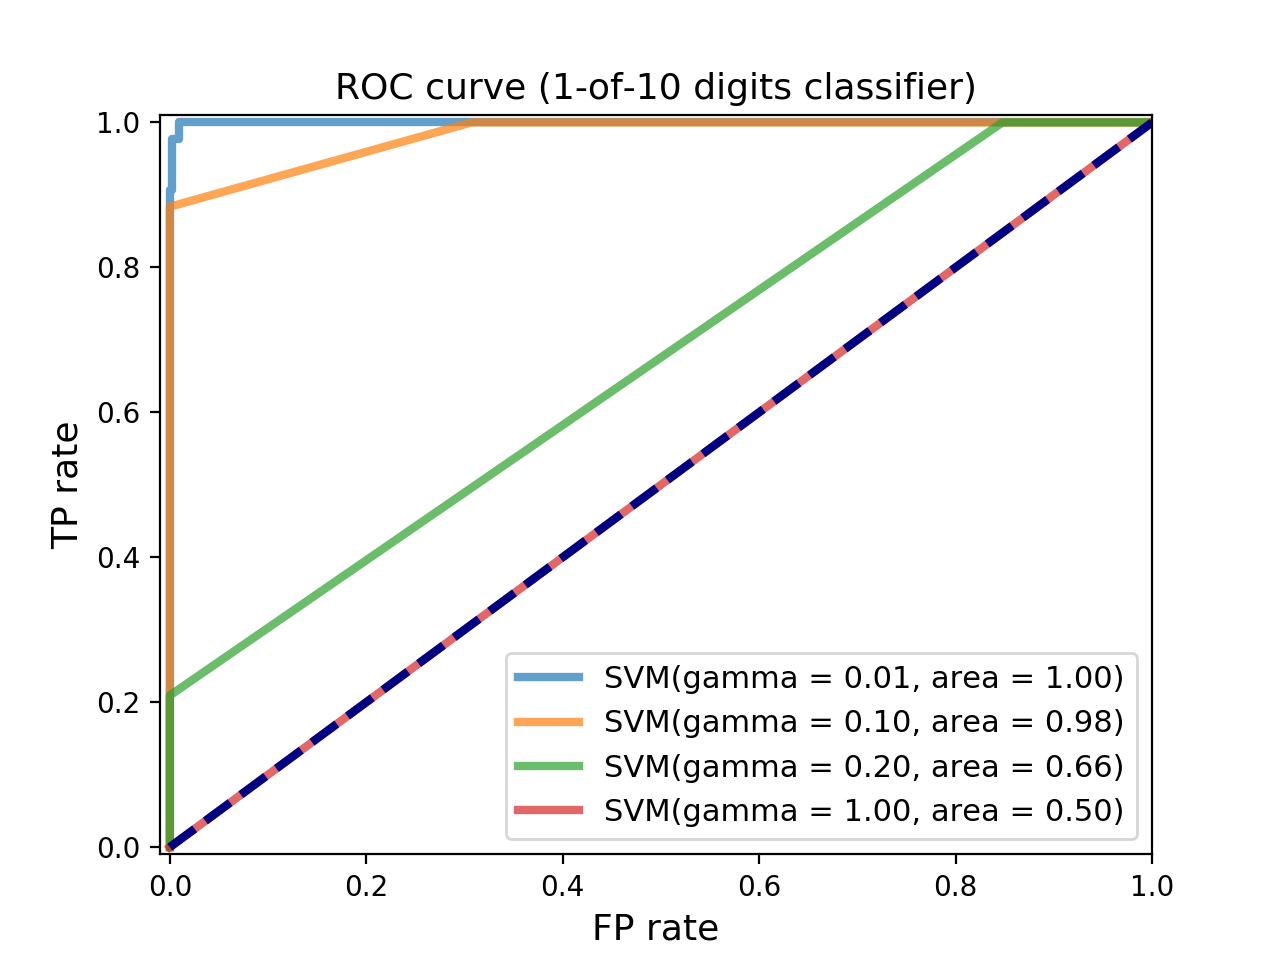

gamma = 0.01 accuracy = 0.91 AUC = 1.00
gamma = 0.10 accuracy = 0.90 AUC = 0.98
gamma = 0.20 accuracy = 0.90 AUC = 0.66
gamma = 1.00 accuracy = 0.90 AUC = 0.50


In [64]:
from matplotlib import cm
X_train, X_test, y_train, y_test = train_test_split(X,y_binary_imbalanced, random_state=0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])

for g in [0.01,0.1,0.20,1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test,y_test)
    print('gamma = {:.2f} accuracy = {:.2f} AUC = {:.2f}'.format(g,accuracy_svm, roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3,alpha=0.7,label='SVM(gamma = {:0.2f}, area = {:0.2f})'.format(g,roc_auc_svm))

plt.plot([0,1],[0,1],color='navy',lw=3,linestyle='--')
plt.xlabel('FP rate', fontsize=13)
plt.ylabel('TP rate', fontsize=13)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=13)
plt.legend(loc='lower right', fontsize=11)
plt.show()

#### Evaluation measure for multi-class classification

Mult-class confusion matrix

<IPython.core.display.Javascript object>


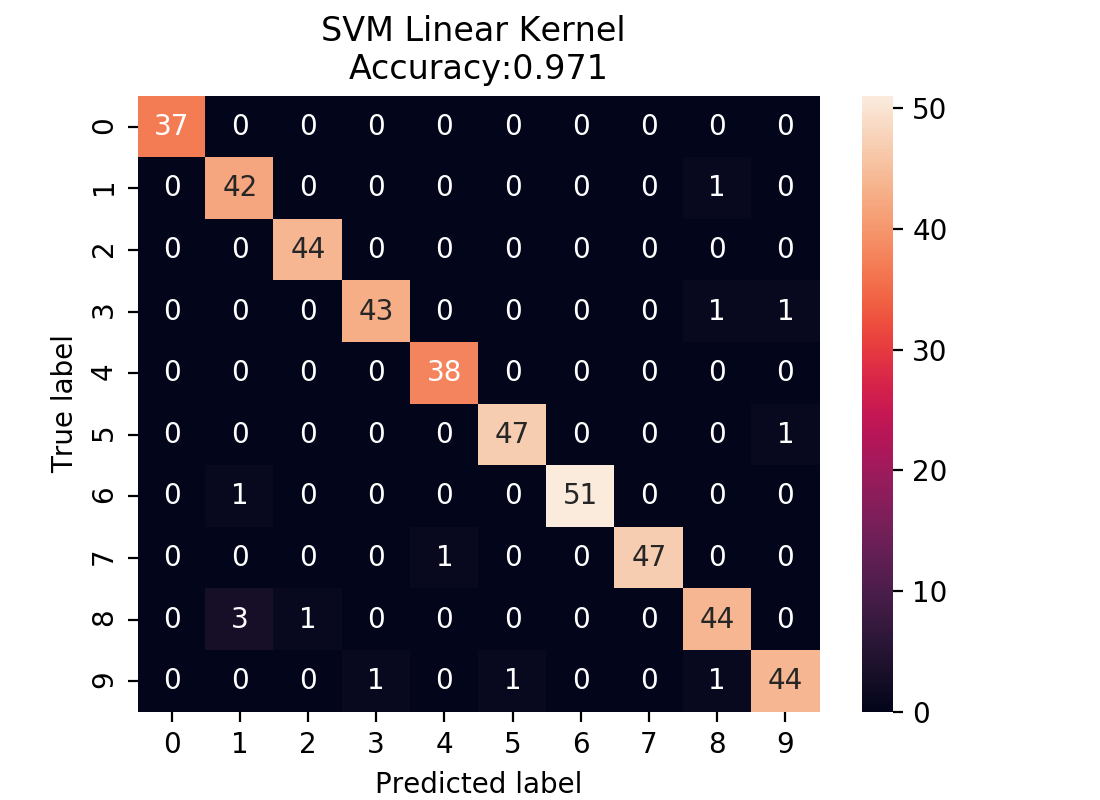

<IPython.core.display.Javascript object>


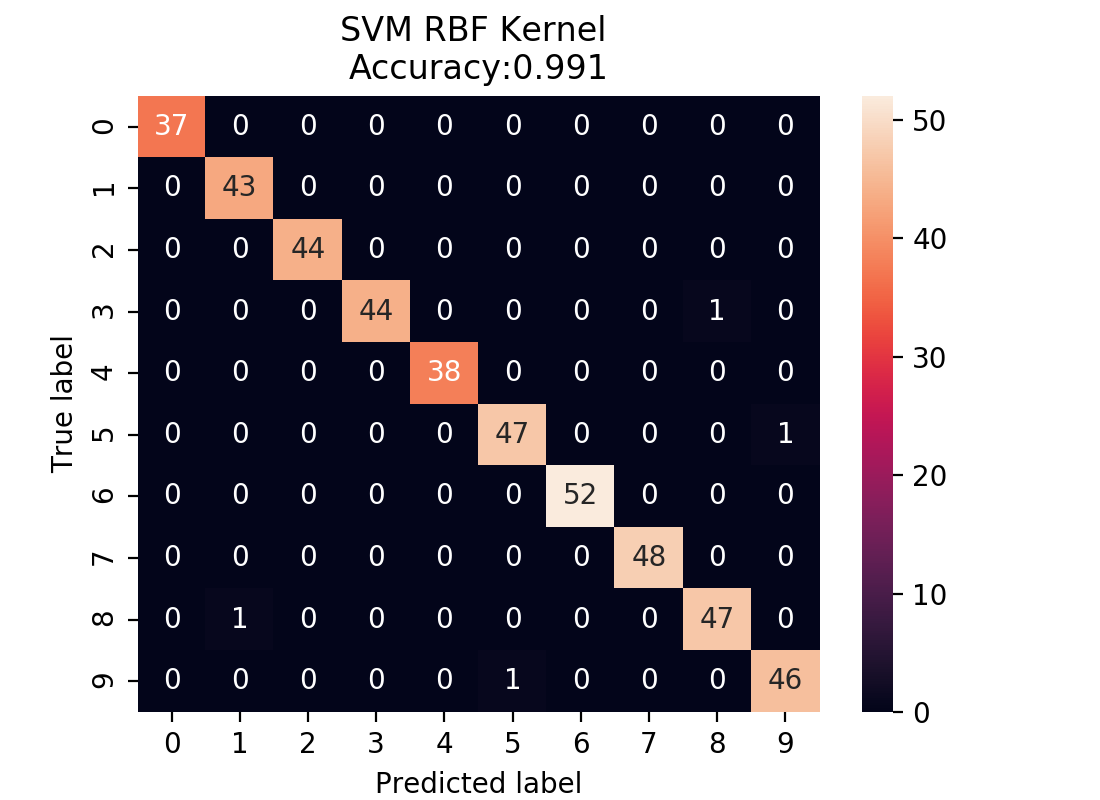

Text(0.5, 14.722222222222216, 'Predicted label')

In [65]:
dataset = load_digits()
X,y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X,y,random_state=0)

svm = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,10)], 
                     columns = [i for i in range(0,10)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'
          .format(accuracy_score(y_test_mc, svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

svm = SVC(kernel = 'rbf').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,10)], 
                     columns = [i for i in range(0,10)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'
          .format(accuracy_score(y_test_mc, svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')



In [66]:
print(classification_report(y_test_mc, svm_predicted_mc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       0.98      0.98      0.98        48
           9       0.98      0.98      0.98        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



#### Micro- vs. macro-averaged metrics

In [67]:
print(precision_score(y_test_mc, svm_predicted_mc,average='micro'))
print(precision_score(y_test_mc, svm_predicted_mc,average='macro'))

0.9911111111111112
0.991432946486138


In [68]:
print(f1_score(y_test_mc, svm_predicted_mc, average='micro'))
print(f1_score(y_test_mc, svm_predicted_mc, average='macro'))

0.9911111111111112
0.991432652965891


### Regression evaluation metrics

In [69]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

In [70]:
diabetes = datasets.load_diabetes()
X = diabetes.data[:,None,6]
y = diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy='mean').fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

In [71]:
print('Linear model, coeff:', lm.coef_)
print('Mean squared error(dummy)', mean_squared_error(y_test, y_predict_dummy_mean))
print('Mean squared error(linear model)', mean_squared_error(y_test, y_predict))
print('r2_score(dummy)', r2_score(y_test, y_predict_dummy_mean))
print('r2_score(linear model)', r2_score(y_test, y_predict))

Linear model, coeff: [-698.80206267]
Mean squared error(dummy) 4965.126471649221
Mean squared error(linear model) 4646.740446731375
r2_score(dummy) -0.00014359578276068596
r2_score(linear model) 0.06399006639614913


<IPython.core.display.Javascript object>


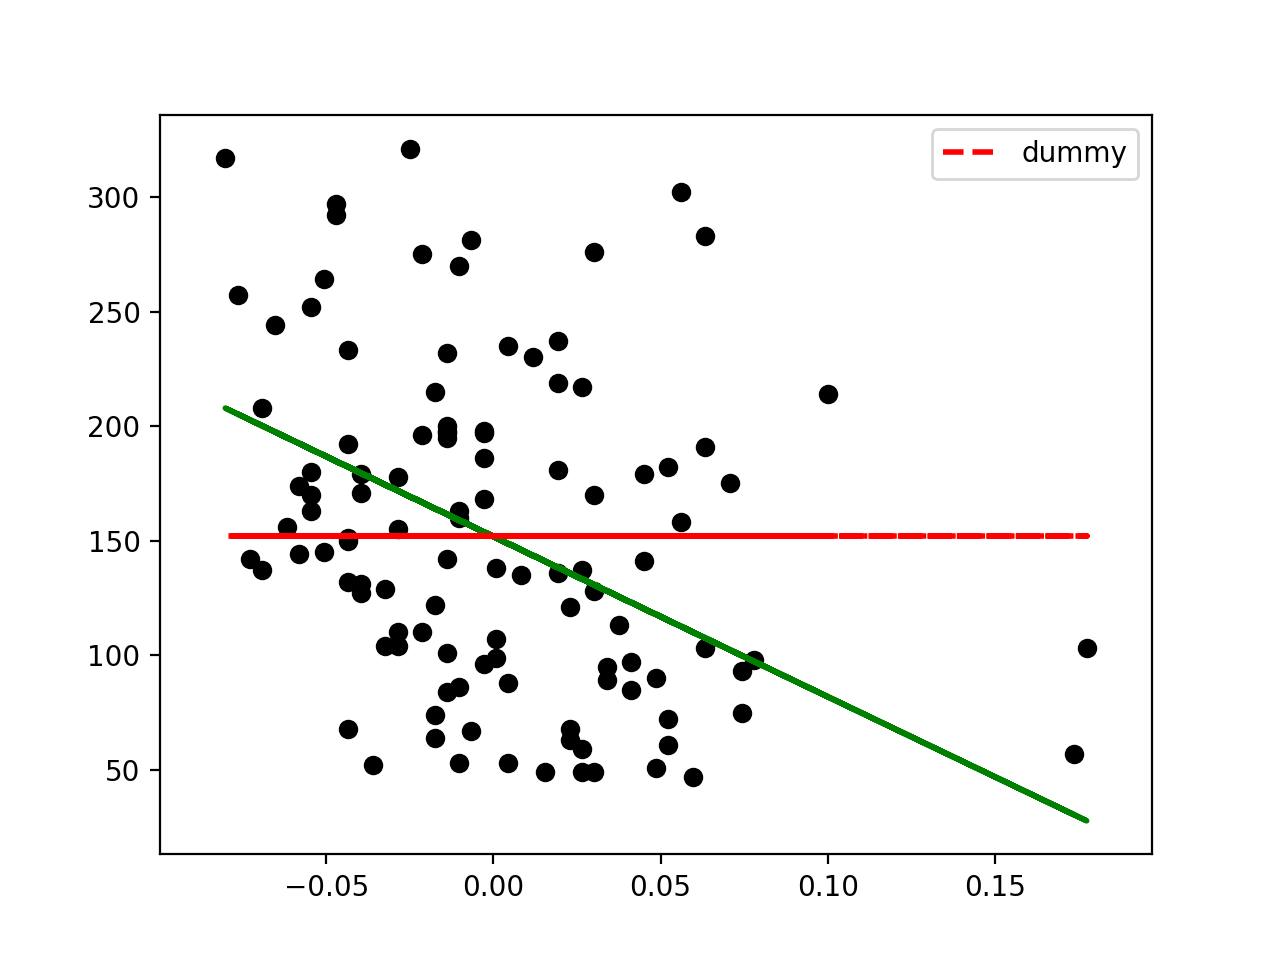

In [72]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_predict, color='green', linewidth=2)
plt.plot(X_test, y_predict_dummy_mean, color='red',
         linestyle='dashed', linewidth=2,label='dummy')
plt.legend()

### Model selection using evaluation metrics

#### Cross-validation example

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
dataset = load_digits()
X, y = dataset.data, dataset.target==1
clf = SVC(kernel='linear',C=1)
print('accuracy',cross_val_score(clf,X,y,cv=5))
print('AUC',cross_val_score(clf,X,y,cv=5, scoring='roc_auc'))
print('recall',cross_val_score(clf,X,y,cv=5, scoring='recall'))

accuracy [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
AUC [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
recall [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]


#### Grid search example

In [74]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

dataset = load_digits()
X,y=dataset.data, dataset.target==1
X_train, X_test, y_train, y_text = train_test_split(X,y,random_state=0)
clf=SVC(kernel='rbf')
grid_values={'gamma':[0.001,0.01,0.05,0.1,1,10,100]}

grid_clf_acc = GridSearchCV(clf,param_grid=grid_values)
grid_clf_acc.fit(X_train,y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test)

print('best parameter max. accuracy', grid_clf_acc.best_params_)
print('best score accuracy', grid_clf_acc.best_score_)

best parameter max. accuracy {'gamma': 0.001}
best score accuracy 0.9985157648354676


In [75]:
# alternative metric to optimize: AUC
grid_clf_acc = GridSearchCV(clf,param_grid=grid_values,scoring='roc_auc')
grid_clf_acc.fit(X_train,y_train)
y_decision_fn_scores_auc = grid_clf_acc.decision_function(X_test)
# print('Test set AUC:',roc_auc_score(y_test,y_decision_fn_scores_auc))

print('best parameter max. auc', grid_clf_acc.best_params_)
print('best score auc', grid_clf_acc.best_score_)

best parameter max. auc {'gamma': 0.001}
best score auc 1.0


#### Evaluation metrics supported for model selection

In [76]:
from sklearn.metrics.scorer import SCORERS
print(sorted(list(SCORERS.keys())))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']


### Two-feature classification example using the digits dataset

#### Optimizing a classifier using different evaluation metrics

In [77]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [78]:
dataset = load_digits()
X,y=dataset.data, dataset.target==1
X_train, X_test, y_train, y_text = train_test_split(X,y,random_state=0)

In [79]:
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+np.random.rand(X_train.shape[0],2) - jitter_delta
X_twovar_test = X_test[:,[20,59]]+np.random.rand(X_test.shape[0],2) - jitter_delta

In [80]:
clf = SVC(kernel = 'linear').fit(X_twovar_train, y_train)
grid_values = {'class_weight':['balanced',{1:2},{1:3},{1:4},{1:5},{1:10},{1:20},{1:50}]}
for i, eval_metric in enumerate(('precision','recall','f1','roc_auc')):
    grid_clf_custom = GridSearchCV(clf,param_grid=grid_values,scoring=eval_metric)
    grid_clf_custom.fit(X_twovar_train,y_train)
    print('best param',eval_metric, grid_clf_custom.best_params_)
    print('best score',eval_metric, grid_clf_custom.best_score_)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

best param precision {'class_weight': {1: 2}}
best score precision 0.5188768115942028
best param recall {'class_weight': {1: 50}}
best score recall 0.9214285714285714
best param f1 {'class_weight': {1: 3}}
best score f1 0.5145463596579216
best param roc_auc {'class_weight': {1: 4}}
best score roc_auc 0.8920689715861349


#### Precision-recall curve for the default SVC classifier(with balanced class weights)

In [81]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve

In [40]:
dataset = load_digits()
X,y=dataset.data, dataset.target==1
X_train, X_test, y_train, y_text = train_test_split(X,y,random_state=0)

In [41]:
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+np.random.rand(X_train.shape[0],2) - jitter_delta
X_twovar_test = X_test[:,[20,59]]+np.random.rand(X_test.shape[0],2) - jitter_delta

In [42]:
clf = SVC(kernel = 'linear').fit(X_twovar_train, y_train)
y_scores = clf.decision_function(X_twovar_test)

# ValueError: multiclass format is not supported
# precision_recall_curve(y_test,y_scores)

closest_zero=np.argmin(np.abs(thresholds))
closest_zero_p=precision[closest_zero]
closest_zero_r=recall[closest_zero]